<H1>Лабораторная работа №3</H1>

<H3>Ким Д.А. 5130901/10201</H3>

<H3>Упражнение 3.2</H3>
Создадим SawtoothChirp, который наследуется от Chirp.

In [12]:
import thinkdsp
import math
import numpy as np
class SawtoothChirp(thinkdsp.Chirp):
    
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = thinkdsp.PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / thinkdsp.PI2
        frac, _=np.modf(cycles)
        ys = self.amp*2*thinkdsp.unbias(frac) * np.cos(phases)
        return ys

Посмотрим как выглядит график частоты

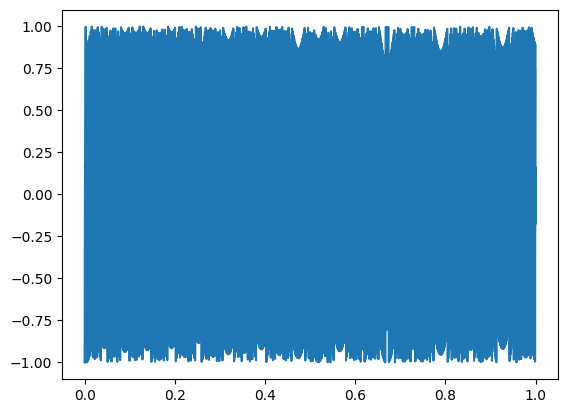

In [15]:
signal = SawtoothChirp(start=440, end=880, amp=1)
duration = 440*4
sawtoothWave=signal.make_wave(1, 0)
sawtoothWave.plot()
sawtoothWave.make_audio()

Нарисуем спектрограмму этого сегмента.

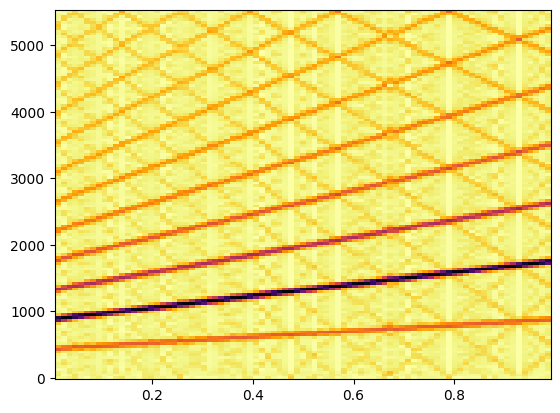

In [16]:
spectrum = sawtoothWave.make_spectrogram(256)
spectrum.plot()

Можно увидеть биения и даже услышать их в аудио файле.

<H3>Упражнение 3.3</H3>

Создадим пилообразный чирп частотой от 2500 до 3000 Гц и и сгенерируем на его основе сигнал длительностью 1с и частотой кадров 20 кГц. Также построим его спектр.

In [17]:
signal3 = SawtoothChirp(start=2500, end=3000)
wave3 = signal3.make_wave(duration=1, framerate=20000)
wave3.make_audio()

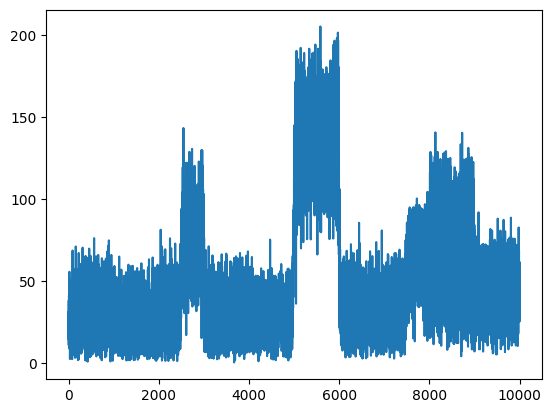

In [18]:
sp = wave3.make_spectrum()
sp.plot()

Как мы видим, в районе от 2500 до 3000 мы видим "башню" повышенных амплитуд. Они также возникают в гармонике на частотах 5000-6000.

<H3>Упражнение 3.4</H3>

Скачаем глиссандо. Послушаем его звук и распечатаем спектрограмму.

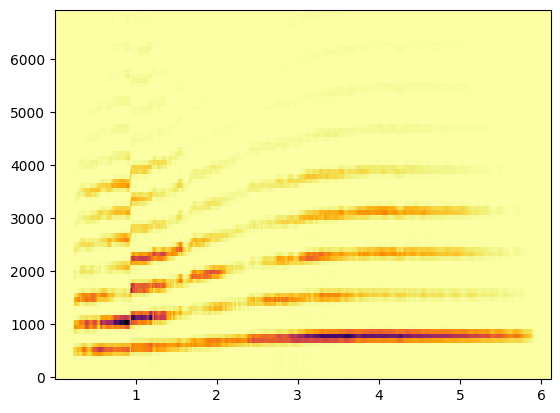

In [37]:
gl_wave = thinkdsp.read_wave('sounds/code_72475__rockwehrmann__glissup02.wav')
gl_wave.make_spectrogram(512).plot(high=7000)
gl_wave.make_audio()

<H3>Упражнение 3.5</H3>

Создадим класс имитирующий игру глиссандо на тромбоне и создадим сигнал играющий от C3 до F3 и обратно до C3.

In [53]:
class TromboneGlissando(thinkdsp.Chirp):
    def evaluate(self, ts):
        l1 = 1/self.start
        l2 = 1/self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1/lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = thinkdsp.PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

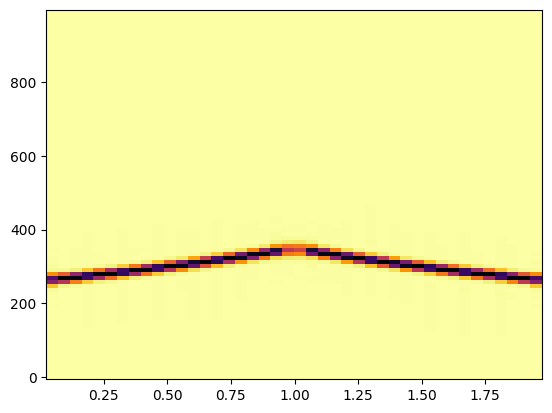

In [54]:
tromboneGliss1 = TromboneGlissando(start=262, end=349)
trombWave1 = tromboneGliss1.make_wave(duration=1)
trombWave1.apodize()
tromboneGliss2 = TromboneGlissando(start=349, end=262)
trombWave2 = tromboneGliss2.make_wave(duration=1)
trombWave2.apodize()
trombWave = trombWave1 | trombWave2
trombWave.make_spectrogram(1024).plot(high=1000)
trombWave.make_audio()

Сигнал похож на линейный чирп.

<H3>Упражнение 3.6</H3>

Запишем серию гласных звуков и посмотрим на спектрограмму данного аудио.

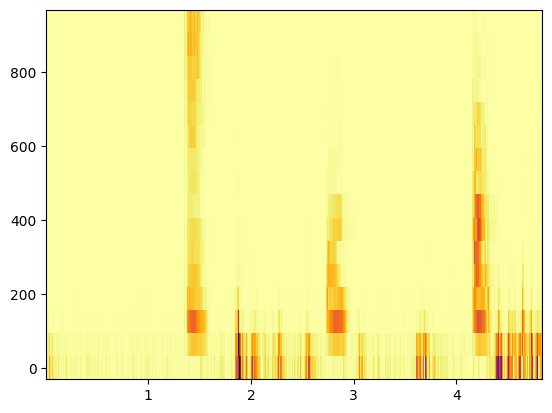

In [59]:
vowels = thinkdsp.read_wave('sounds/vowels.wav')
vowels.make_spectrogram(256).plot(high=1000)
vowels.make_audio()

Видно, что разные гласные отличаются по высоте частот. Самая высокая "а", а самая низкая "и". 